## Load the dataset

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
train_path = r'C:\modified-dataset\train'
val_path = r'C:\modified-dataset\val'
test_path = r'C:\modified-dataset\test'

# Image preprocessing
datagen = ImageDataGenerator(rescale=1./255)

# Load training data (this is the corrected line)
train_data = datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_data = datagen.flow_from_directory(
    val_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_data = datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 2400 images belonging to 9 classes.
Found 300 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


In [6]:
import os

def count_images(path):
    count = 0
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                count += 1
    return count

print("Images in train folder:", count_images(r'C:\modified-dataset\train'))

Images in train folder: 2400


In [68]:
import os

base_path = r'C:\Users\Lenovo\e-waste classifier\dataset'

for category in ['train', 'val', 'test']:
    path = os.path.join(base_path, category)
    classes = next(os.walk(path))[1]
    print(f"{category} has classes: {classes}")

train has classes: ['e-waste', 'non e-waste']
val has classes: ['e-waste', 'non e-waste']
test has classes: ['e-waste', 'non e-waste']


In [66]:
import os
import shutil

base_path = r'C:\Users\Lenovo\e-waste classifier\dataset'

# Remove any .ipynb_checkpoints folders
for category in ['train', 'val', 'test']:
    path = os.path.join(base_path, category, '.ipynb_checkpoints')
    if os.path.exists(path):
        shutil.rmtree(path)
        print(f"Deleted: {path}")

    # Also delete if nested inside e-waste or not-e-waste
    for label in ['e-waste', 'not-e-waste']:
        sub_path = os.path.join(base_path, category, label, '.ipynb_checkpoints')
        if os.path.exists(sub_path):
            shutil.rmtree(sub_path)
            print(f"Deleted: {sub_path}")

Deleted: C:\Users\Lenovo\e-waste classifier\dataset\train\.ipynb_checkpoints
Deleted: C:\Users\Lenovo\e-waste classifier\dataset\val\.ipynb_checkpoints
Deleted: C:\Users\Lenovo\e-waste classifier\dataset\test\.ipynb_checkpoints


In [60]:
import os
import shutil

# Folder where the class folders like Battery, Keyboard etc. are stored
source_folder = r'C:\modified-dataset\test'

# Final destination where images should go
target_folder = r'C:\Users\Lenovo\e-waste classifier\dataset\test\e-waste'

# Create the target folder if it doesn't exist
os.makedirs(target_folder, exist_ok=True)

# Walk through all subfolders and move all image files
for root, dirs, files in os.walk(source_folder):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            src = os.path.join(root, file)
            dst = os.path.join(target_folder, file)
            shutil.copy(src, dst)  # or use shutil.move() if you want to move instead

In [61]:
import os

target_folder = r'C:\Users\Lenovo\e-waste classifier\dataset\test\e-waste'
print("Total e-waste images:", len(os.listdir(target_folder)))

Total e-waste images: 300


In [37]:
r'C:\modified_dataset\train'

'C:\\modified_dataset\\train'

In [30]:
import os
print(os.getcwd())

C:\Users\Lenovo\e-waste classifier


In [12]:
import os
print(os.getcwd())

C:\Users\Lenovo\e-waste classifier


## Build the CNN model

In [84]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Show model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.save("model.keras")

In [86]:
import os
print(os.listdir())  # Lists all files in your working directory

['.ipynb_checkpoints', 'dataset', 'e-waste classifier.ipynb', 'model.keras']


## Compile the model

In [71]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Visualize sample for each class

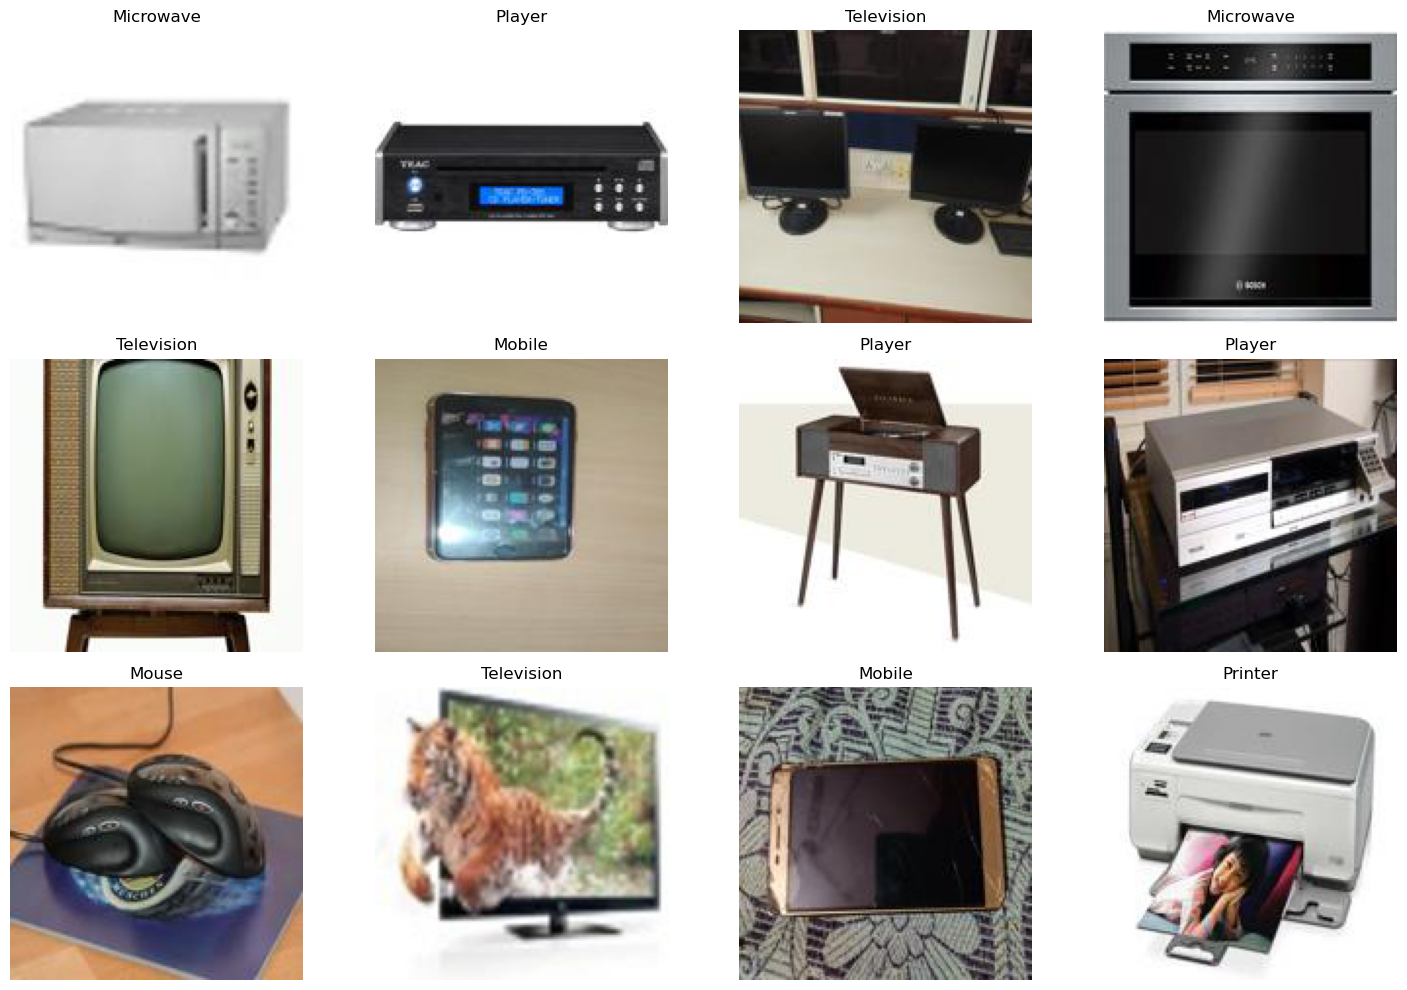

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Get class labels
class_indices = train_data.class_indices
class_names = list(class_indices.keys())

# Get one batch of images and labels
images, labels = next(train_data)

plt.figure(figsize=(15, 10))

# Show first 12 images
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i])
    class_index = np.argmax(labels[i])
    plt.title(class_names[class_index])
    plt.axis("off")

plt.tight_layout()
plt.show()

## check number of images to ensure balance
## understand image properties like image dimensions and class labels

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_class_distribution(generator, title="Class Distribution"):
    """
    Plots the number of images per class for a Keras ImageDataGenerator object.
    
    Args:
        generator: A DirectoryIterator (from flow_from_directory)
        title: Title for the plot
    """
    class_counts = {k: 0 for k in generator.class_indices}

    # Loop through the entire dataset once
    for i in range(len(generator)):
        images, labels = generator[i]
        class_indices = np.argmax(labels, axis=1)
        for index in class_indices:
            class_name = list(generator.class_indices.keys())[index]
            class_counts[class_name] += 1

    # Plotting
    class_names = list(class_counts.keys())
    counts = list(class_counts.values())
    
    #plot
    plt.figure(figsize=(8, 5))
    plt.bar(class_names, counts, color='skyblue')
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

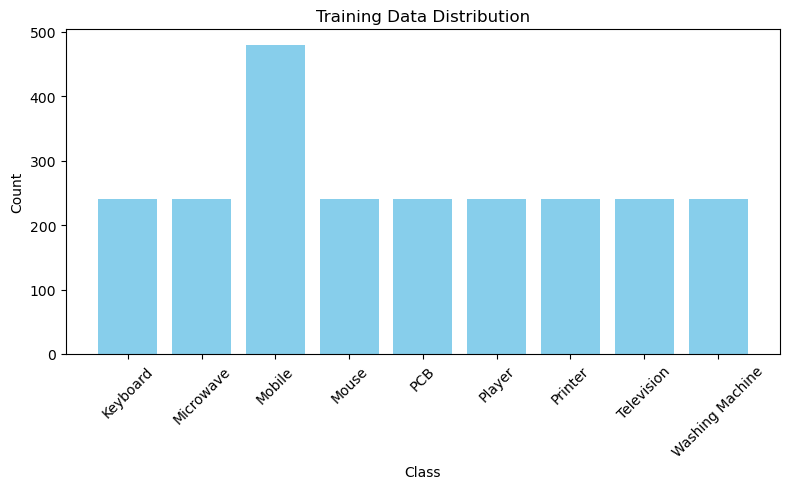

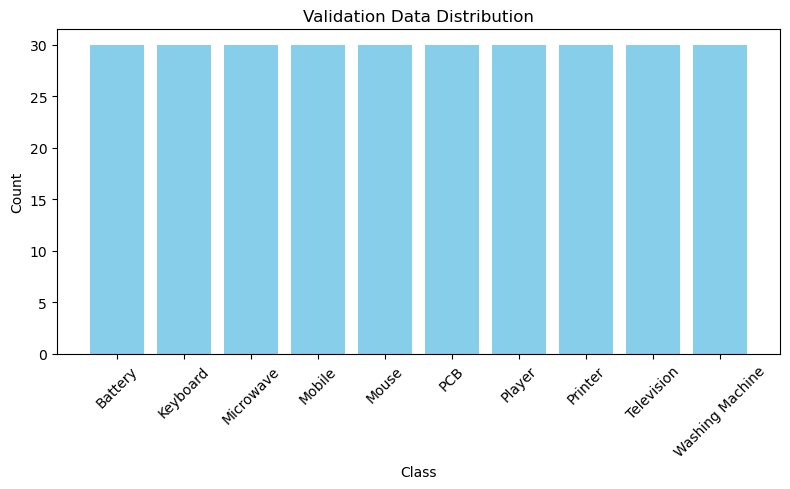

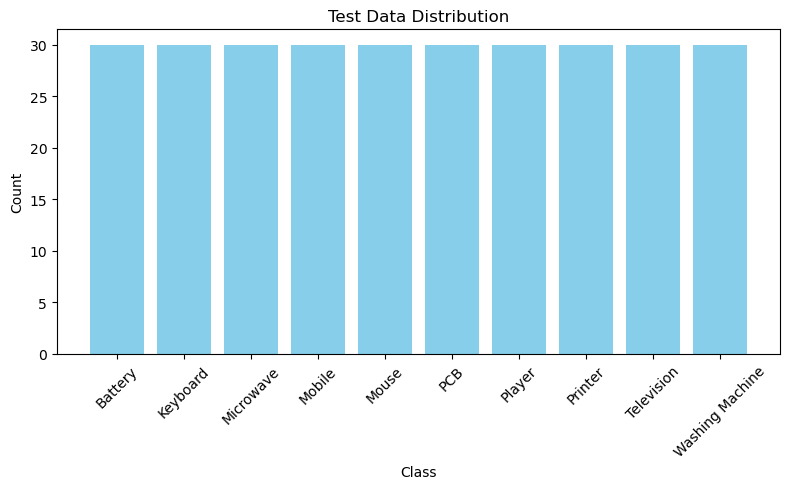

In [19]:
plot_class_distribution(train_data, "Training Data Distribution")
plot_class_distribution(val_data, "Validation Data Distribution")
plot_class_distribution(test_data, "Test Data Distribution")

In [24]:
import tensorflow as tf

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

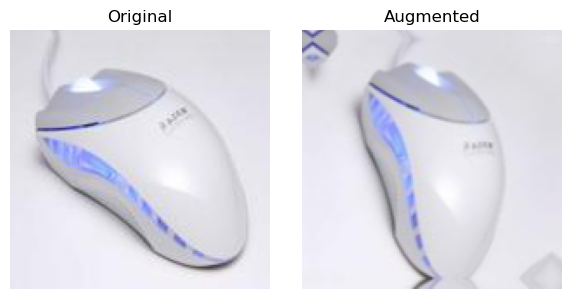

In [25]:
import matplotlib.pyplot as plt

# Get 1 batch from your train_data
images, labels = next(train_data)

# Apply data augmentation to the first image
augmented_image = data_augmentation(images[0:1])  # Must keep batch dimension

# Plot original vs augmented
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(images[0])
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(augmented_image[0].numpy())
plt.title("Augmented")
plt.axis("off")

plt.tight_layout()
plt.show()

## Model selection

In [33]:
base_model = tf.keras.applications.EfficientNetV2B0(
    input_shape=(150, 150, 3),
    include_top=False,  # Exclude final classification layer
    weights='imagenet'  # Use pretrained weights
)
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

## Model training

In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Number of classes in your dataset
num_classes = len(train_data.class_indices)

# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# Load the EfficientNetV2B0 base model
base_model = tf.keras.applications.EfficientNetV2B0(
    input_shape=(150, 150, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze the first 100 layers (optional fine-tuning)
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

# Build the full model
model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Final output layer
])

In [37]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Callbacks

In [43]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# ✅ Step 1: Get number of classes dynamically
num_classes = len(train_data.class_indices)

# ✅ Step 2: Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# ✅ Step 3: Load EfficientNetV2B0 base model
base_model = tf.keras.applications.EfficientNetV2B0(
    input_shape=(150, 150, 3),
    include_top=False,
    weights='imagenet'
)

# ✅ Step 4: Freeze initial layers (optional fine-tuning)
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

# ✅ Step 5: Build the model
model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # ✅ Now uses correct class count
])

# ✅ Step 6: Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Step 7: Callbacks
checkpoint_cb = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

earlystop_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

reduce_lr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    min_lr=1e-6
)

# ✅ Step 8: Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[checkpoint_cb, earlystop_cb, reduce_lr_cb]
)


Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1651 - loss: 2.2168

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 10), output.shape=(None, 9)

## Model architecture

In [44]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)            │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_11 (Rescaling)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, 5, 5, 1280)          │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,725,997 (63.80 MB)

 Trainable params: 5,320,777 (20.30 MB)

 Non-trainable params: 763,664 (2.91 MB)

 Optimizer params: 10,641,556 (40.59 MB)

In [45]:
base_model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)   │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_10 (Rescaling)      │ (None, 150, 150, 3)       │               0 │ input_layer_12[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_9               │ (None, 150, 150, 3)       │               0 │ rescaling_10[0][0]         │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 75, 75, 32)        │             864 │ normalization_9[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 75, 75, 32)        │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 75, 75, 32)        │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_conv (Conv2D) │ (None, 75, 75, 16)        │           4,608 │ stem_activation[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_bn            │ (None, 75, 75, 16)        │              64 │ block1a_project_conv[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_project_activation    │ (None, 75, 75, 16)        │               0 │ block1a_project_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_expand_conv (Conv2D)  │ (None, 38, 38, 64)        │           9,216 │ block1a_project_activatio… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_expand_bn             │ (None, 38, 38, 64)        │             256 │ block2a_expand_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_expand_activation     │ (None, 38, 38, 64)        │               0 │ block2a_expand_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_project_conv (Conv2D) │ (None, 38, 38, 32)        │           2,048 │ block2a_expand_activation… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2a_project_bn            │ (None, 38, 38, 32)        │             128 │ block2a_project_conv[0][0] │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 5,155,648 (19.67 MB)

 Non-trainable params: 763,664 (2.91 MB)

## Model performance visualization

In [51]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # or any number you want
    callbacks=[checkpoint_cb, earlystop_cb, reduce_lr_cb]
)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1975 - loss: 2.1747

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 10), output.shape=(None, 9)

NameError: name 'history' is not defined

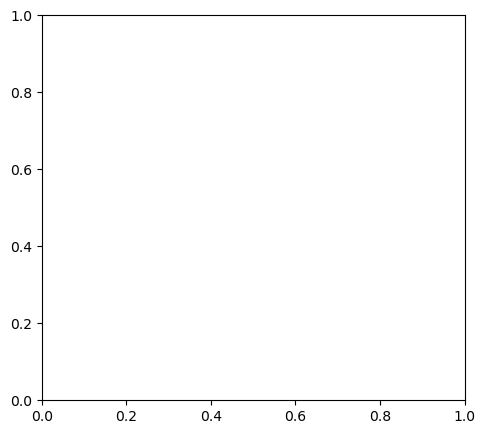

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Model performance

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 403ms/step
📋 Classification Report:
                 precision    recall  f1-score   support

        Battery       0.00      0.00      0.00        30
       Keyboard       0.00      0.00      0.00        30
      Microwave       0.10      1.00      0.18        30
         Mobile       0.00      0.00      0.00        30
          Mouse       0.00      0.00      0.00        30
            PCB       0.00      0.00      0.00        30
         Player       0.00      0.00      0.00        30
        Printer       0.00      0.00      0.00        30
     Television       0.00      0.00      0.00        30
Washing Machine       0.00      0.00      0.00        30

       accuracy                           0.10       300
      macro avg       0.01      0.10      0.02       300
   weighted avg       0.01      0.10      0.02       300



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packag

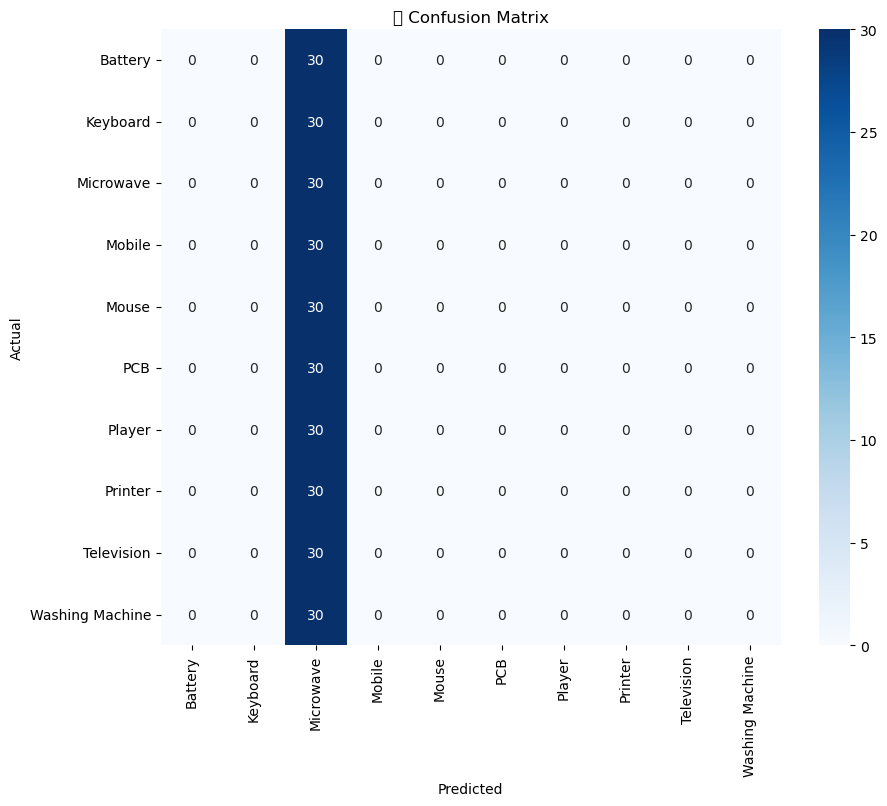

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Get predicted probabilities
y_pred_probs = model.predict(test_data)

# Convert predicted probabilities to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# True class labels
y_true = test_data.classes

# Class label names (same order as the one-hot encoding)
class_labels = list(test_data.class_indices.keys())
print("📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title('📊 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()